In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle

## Bagging

In [2]:
def plot_decision_boundary(X, model):
    h = .02 

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                       np.arange(y_min, y_max, h))


    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, cmap=plt.cm.Paired)

## Implement Bagged Tree Classifier

class Mymodel(BaseEstimator):</br>
    - def __init__(self, ...):</br>
    - def fit(self, ...):</br>
    - def predict(self, ...):</br>
    - def score(self, ...):</br>

In [3]:
class BaggedTreeClassifier:
    def __init__(self, M):
        self.M = M
    
    def fit(self, X, Y):
        N = len(X) #number of samples
        self.models = list() #model list
        for m in range(self.M): #fit for M models
            idx = np.random.choice(N, size=N, replace=True) #each model choose N with replacement
            Xb = X[idx]
            Yb = Y[idx]
            model = DecisionTreeClassifier(max_depth = 5)
            model.fit(Xb, Yb)
            self.models.append(model)
    
    def predict(self, X):
        predictions = np.zeros(len(X))
        for model in self.models:
            predictions += model.predict(X)
        return np.round(predictions / self.M)
    
    def score(self, X, Y):
        result = self.predict(X)
        return np.mean(result == Y)

### Experiment on linearly inseparable data: XOR

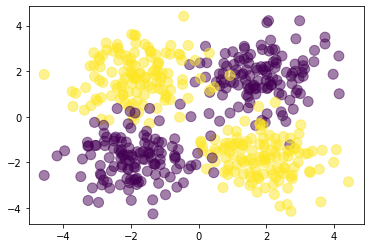

In [4]:
np.random.seed(10)

N = 500
D = 2
X = np.random.randn(N, D)

delta = 1.75
X[:125] += np.array([delta, delta])
X[125:250] += np.array([delta, -delta])
X[250:375] += np.array([-delta, delta])
X[375:] += np.array([-delta, -delta])
Y = np.array([0] * 125 + [1]*125 + [1]*125 + [0] * 125)

plt.scatter(X[:,0], X[:,1], s=100, c=Y, alpha=0.5)
plt.show()

score for tree of depth 3: 0.922


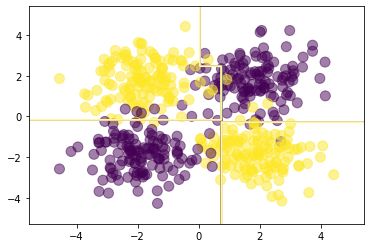

In [5]:
model_depth_3 = DecisionTreeClassifier(criterion='entropy', max_depth=3)
model_depth_3.fit(X, Y)
print("score for tree of depth 3:", model_depth_3.score(X, Y))
plt.scatter(X[:,0], X[:,1], s=100, c=Y, alpha=0.5)
plot_decision_boundary(X, model_depth_3)
plt.show()

score for tree of depth 5: 0.97


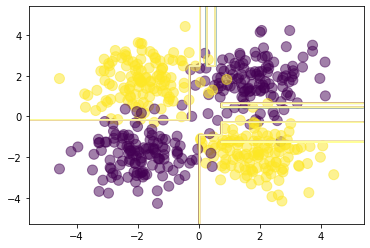

In [6]:
model_depth_5 = DecisionTreeClassifier(criterion='entropy', max_depth=5)
model_depth_5.fit(X, Y)
print("score for tree of depth 5:", model_depth_5.score(X, Y))
plt.scatter(X[:,0], X[:,1], s=100, c=Y, alpha=0.5)
plot_decision_boundary(X, model_depth_5)
plt.show()

score for logistic regression model: 0.504


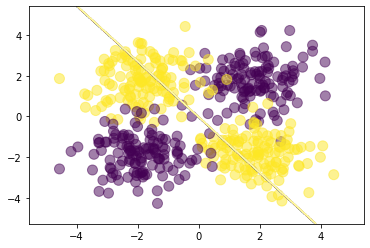

In [7]:
model_logistic = LogisticRegression()
model_logistic.fit(X, Y)
print("score for logistic regression model:", model_logistic.score(X, Y))
plt.scatter(X[:,0], X[:,1], s=100, c=Y, alpha=0.5)
plot_decision_boundary(X, model_logistic)
plt.show()  

score for bagged tree model: 0.964


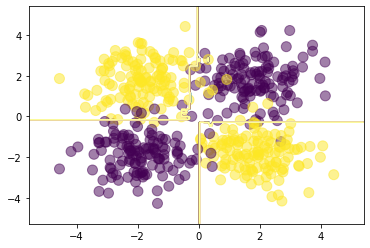

In [8]:
baggedTree = BaggedTreeClassifier(200)
baggedTree.fit(X, Y)
print("score for bagged tree model:", baggedTree.score(X, Y))
plt.scatter(X[:,0], X[:,1], s=100, c=Y, alpha=0.5)
plot_decision_boundary(X, baggedTree)
plt.show()

### Experiment on linearly inseparable data: Donut

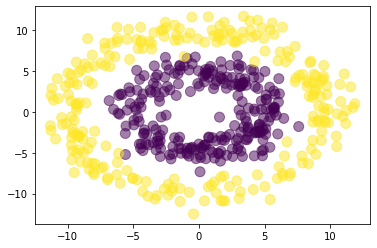

In [9]:
np.random.seed(10)

N = 500
D = 2
X = np.random.randn(N, D)

R_smaller = 5
R_larger = 10

R1 = np.random.randn(N//2) + R_smaller
theta = 2 * np.pi * np.random.random(N//2)
X[:250] = np.concatenate([[R1 * np.cos(theta)], [R1*np.sin(theta)]]).T


R2 = np.random.randn(N//2) + R_larger
theta = 2 * np.pi * np.random.random(N//2)
X[250:] = np.concatenate([[R2 * np.cos(theta)], [R2*np.sin(theta)]]).T

Y = np.array([0] * (N//2) + [1] * (N//2))

plt.scatter(X[:,0], X[:,1], s=100, c=Y, alpha=0.5)
plt.show()

score for basic tree: 1.0


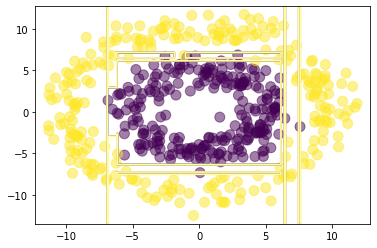

In [10]:
model = DecisionTreeClassifier()
model.fit(X, Y)
print("score for basic tree:", model.score(X, Y))

plt.scatter(X[:,0], X[:,1], s=100, c=Y, alpha=0.5)
plot_decision_boundary(X, model)
plt.show()

score for tree of depth 3: 0.896


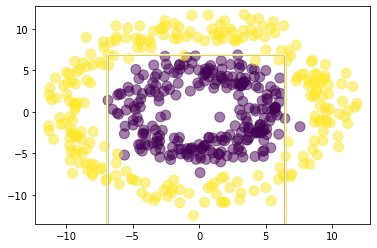

In [11]:
model_depth_3 = DecisionTreeClassifier(criterion='entropy', max_depth=3)
model_depth_3.fit(X, Y)

print("score for tree of depth 3:", model_depth_3.score(X, Y))
plt.scatter(X[:,0], X[:,1], s=100, c=Y, alpha=0.5)
plot_decision_boundary(X, model_depth_3)
plt.show()

score for tree of depth 5: 0.986


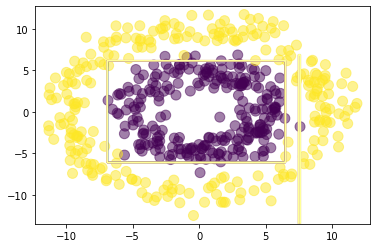

In [12]:
model_depth_5 = DecisionTreeClassifier(criterion='entropy', max_depth=5)
model_depth_5.fit(X, Y)

print("score for tree of depth 5:", model_depth_5.score(X, Y))
plt.scatter(X[:,0], X[:,1], s=100, c=Y, alpha=0.5)
plot_decision_boundary(X, model_depth_5)
plt.show()

score for logistic regression model: 0.564


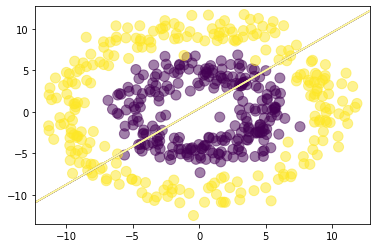

In [13]:
model_logistic = LogisticRegression()
model_logistic.fit(X, Y)
print("score for logistic regression model:", model_logistic.score(X, Y))

plt.scatter(X[:,0], X[:,1], s=100, c=Y, alpha=0.5)
plot_decision_boundary(X, model_logistic)
plt.show()

score for bagged tree: 0.99


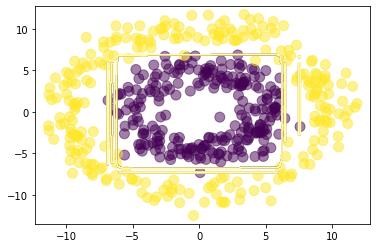

In [14]:
baggedTree = BaggedTreeClassifier(200)
baggedTree.fit(X,Y)
print("score for bagged tree:", baggedTree.score(X, Y))
plt.scatter(X[:,0], X[:,1], s=100, c=Y, alpha=0.5)
plot_decision_boundary(X, baggedTree)
plt.show()